This module is not intended as advice to trade, it is for use in your trading analyses and algorithms. Use at your own risk.

This screener attempts to find range bound markets based on given inputs.

**Required data:**

- Pandas dataframe containing index as datetime and columns (High, Low, Open, Close) as float
- Define the number of breakout periods (default: 20 periods)
- Average True Range (ATR) window (default: 14 periods)
- ATR multiple (default: 1.5)- sensitivity used to determine a level at which the alert will provide a range signal

**Response:**

The response returned is a tuple of the signal and a plotly chart: (signal, chart) create_chart=False is default. The signal is one of three options: 1, 0

  * 1 - trading in a range
  * 0 - not trading in a range

**Dependencies:**

- pandas
- ta
- plotly

**Install module:**

https://pypi.org/project/rangealert/

```pip install rangealert```

**Detailed documentation:**

https://github.com/jonleonATX/range_trading_alert/blob/master/rangealert.ipynb


**Import required modules**

pandas_datareader only used as example. You can generate your timeseries data from whichever source you choose.

In [3]:
import rangealert
import pandas as pd
import pandas_datareader as pdr

# create screener object
rs = rangealert.range_screen()

**Get timeseries**

In [10]:
tickers = ['AAPL', 'NFLX', 'GE', 'CAT']
start_date = '2020-01-01'
end_date = '2021-12-31'

panel_data = pdr.DataReader(tickers, 'yahoo', start_date, end_date)
df = panel_data.stack().reset_index()
df['Date'] = pd.to_datetime(df['Date'])
df['Close'] = df['Close'] * df['Adj Close'] / df['Close']
df['Open'] = df['Open'] * df['Adj Close'] / df['Close']
df['High'] = df['High'] * df['Adj Close'] / df['Close']
df['Low'] = df['Low'] * df['Adj Close'] / df['Close']
df = df.set_index('Date')


In [11]:
symbol = 'CAT'
df1 = df[df['Symbols']==symbol] 
df1 # will pass df1 to screener function later

Attributes,Symbols,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2020-01-02,CAT,145.354584,145.354584,150.550003,147.979996,149.000000,3311900.0
2020-01-03,CAT,143.336472,143.336472,149.960007,147.449997,148.770004,3100600.0
2020-01-06,CAT,143.239868,143.239868,148.559998,146.539993,147.270004,2549600.0
2020-01-07,CAT,141.347275,141.347275,147.570007,145.509995,147.350006,2841900.0
2020-01-08,CAT,142.602585,142.602585,148.570007,146.460007,146.830002,2153200.0
...,...,...,...,...,...,...,...
2021-01-13,CAT,194.853287,194.853287,200.169998,195.800003,198.789993,3154700.0
2021-01-14,CAT,196.355286,196.355286,197.910004,195.360001,196.100006,2486600.0
2021-01-15,CAT,193.589996,193.589996,195.710007,190.880005,195.660004,3314200.0


**Example with default settings**

Note the returned tuple is (0, None) - signal is neutral in that the stock isn't trading in a range based on screener criteria

In [12]:
rs.range_trading(df1, symbol, atr_window=14, range_periods=20, atrmultiple_test=1.5, create_chart=False)

(0, None)

**Example with create_chart=True**

Note the returned is (0, None)

In [13]:
rs.range_trading(df1, symbol, atr_window=14, range_periods=55, atrmultiple_test=1.5, create_chart=True)

(0,
 Figure({
     'data': [{'close': array([145.35458374, 143.33647156, 143.23986816, ..., 193.58999634,
                               194.05999756, 192.22000122]),
               'high': array([150.55000305, 149.96000671, 148.55999756, ..., 195.71000671,
                              196.11000061, 193.8999939 ]),
               'low': array([147.97999573, 147.44999695, 146.53999329, ..., 190.88000488,
                             193.44000244, 190.47000122]),
               'name': 'CAT',
               'open': array([149.        , 148.77000427, 147.27000427, ..., 195.66000366,
                              194.28999329, 192.66000366]),
               'type': 'candlestick',
               'x': array([datetime.datetime(2020, 1, 2, 0, 0),
                           datetime.datetime(2020, 1, 3, 0, 0),
                           datetime.datetime(2020, 1, 6, 0, 0), ...,
                           datetime.datetime(2021, 1, 15, 0, 0),
                           datetime.datetime(2021, 1

**Example with create_chart=True** 

NOTE: Period max and min line need to be inside Upper and Lower test bands on the last date to be considered in a range based on criteria. Below is example with periods = 5 to show this signal a 1

Signal:  1


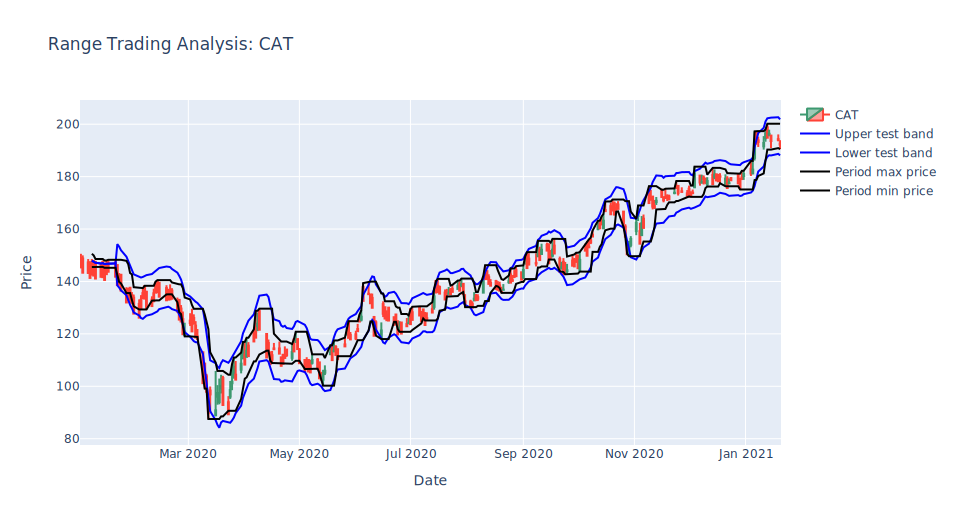

In [18]:
signal, fig = rs.range_trading(df1, symbol, atr_window=14, range_periods=5, atrmultiple_test=1.5, create_chart=True)
print('Signal: ', signal)

fig.show(renderer="svg", width=954, height=525) # for use on github
# fig.show() # for use on local machine

**Additional Methods**

The screener returns several values to use in addition to the signal and chart.

In [15]:
rs.last_open
rs.last_high
rs.last_low
rs.last_close
rs.last_tradingDay
rs.last_atr
rs.avelow
rs.avehigh
rs.avemidprice
rs.rangemaxprice
rs.rangeminprice
rs.last_maxprice
rs.last_minprice
rs.last_upb
rs.last_lpb
rs.last_atr
rs.upb
rs.lpb


Date
2020-01-02           NaN
2020-01-03           NaN
2020-01-06           NaN
2020-01-07           NaN
2020-01-08           NaN
                 ...    
2021-01-13    168.067018
2021-01-14    168.861661
2021-01-15    169.400685
2021-01-19    170.390026
2021-01-20    171.224686
Length: 265, dtype: float64

**Retrieve Chart based on methods above**

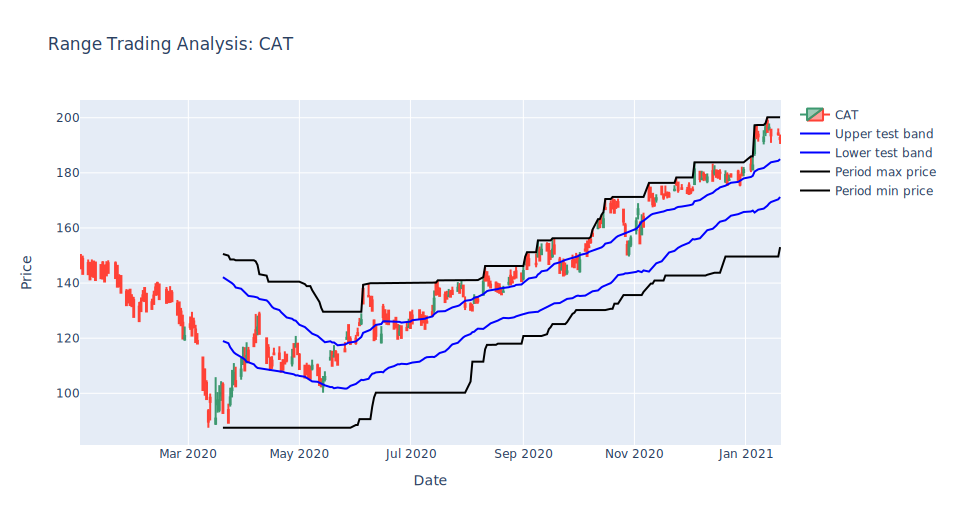

In [16]:
fig = rs.get_range_plot(df1, symbol, rs.upb, rs.lpb, rs.rangemaxprice, rs.rangeminprice)

fig.show(renderer="svg", width=954, height=525) # for use on github
# fig.show() # for use on local machine